# Various test script to construct Convolutional Network from `cs231n/models/cnn.py`

Examples includes
1. feedforward network of convolutional layers only.
2. DAG consisting of convolutional layers.
3. DAG consisting of DAG with skip connections.

In [14]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from cs231n.models.cnn import CNN, HyperParameter, default_parameters
import tensorflow as tf
from cs231n.data_feeder import CifarDataFeeder
from cs231n.data_utils import get_CIFAR10_data
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Example 1: Feedforward Convolutional NN

In [ ]:
tf.layers.

In [7]:
hyperparam = dict()
hyperparam['layer_1'] = default_parameters("conv2d")
hyperparam['layer_1']['filter'] = [5, 5, 3, 48]
hyperparam['layer_1']['bias'] = [48]

hyperparam['layer_2'] = default_parameters("conv2d")
hyperparam['layer_2']['input'] = 'layer_1'
hyperparam['layer_2']['filter'] = [3, 3, 48, 24]
hyperparam['layer_2']['bias'] = [24]
hyperparam['layer_2']['max_pool'] = [1, 2, 2, 1]

hyperparam['layer_3'] = default_parameters("conv2d")
hyperparam['layer_3']['input'] = 'layer_2'
hyperparam['layer_3']['filter'] = [3, 3, 24, 24]
hyperparam['layer_3']['bias'] = [24]

hyperparam['layer_4'] = default_parameters("conv2d")
hyperparam['layer_4']['input'] = 'layer_3'
hyperparam['layer_4']['filter'] = [5, 5, 24, 24]
hyperparam['layer_4']['bias'] = [24]
hyperparam['layer_4']['max_pool'] = [1, 2, 2, 1]

'''
hyperparam['layer_5'] = default_parameters("conv2d")
hyperparam['layer_5']['input'] = 'layer_4'
hyperparam['layer_5']['filter'] = [5, 5, 64, 64]
hyperparam['layer_5']['bias'] = [64]

hyperparam['layer_6'] = default_parameters("conv2d")
hyperparam['layer_6']['input'] = 'layer_5'
hyperparam['layer_6']['filter'] = [5, 5, 32, 128]
hyperparam['layer_6']['bias'] = [128]
hyperparam['layer_4']['max_pool'] = None
'''

hyperparam['linear'] = default_parameters("linear")
hyperparam['linear']['weight'] = [8 * 8 * 24, 10]
hyperparam['linear']['input'] = 'layer_4'

cnn_param = HyperParameter(hyperparam, ['layer_{}'.format(i + 1) for i in range(4)])
print(cnn_param.parameters)

ImportError: cannot import name 'deconv_2d'

## Example 2: DAG of convolutional layers, with two input layers to linear layer

In [54]:
hyperparam = dict()
hyperparam['layer_1'] = default_parameters("conv2d")
hyperparam['layer_1']['input'] = None
hyperparam['layer_1']['output'] = ['layer_2', 'layer_3']
hyperparam['layer_1']['filter'] = [5, 5, 3, 48]
hyperparam['layer_1']['bias'] = [48]

hyperparam['layer_2'] = default_parameters("conv2d")
hyperparam['layer_2']['input'] = ['layer_1']
hyperparam['layer_2']['output'] = None
hyperparam['layer_2']['filter'] = [3, 3, 48, 24]
hyperparam['layer_2']['bias'] = [24]
hyperparam['layer_2']['max_pool'] = [1, 2, 2, 1]

hyperparam['layer_3'] = default_parameters("conv2d")
hyperparam['layer_3']['input'] = ['layer_1']
hyperparam['layer_3']['output'] = ['layer_4']
hyperparam['layer_3']['filter'] = [3, 3, 48, 16]
hyperparam['layer_3']['bias'] = [16]
hyperparam['layer_3']['max_pool'] = [1, 2, 2, 1]

hyperparam['layer_4'] = default_parameters("conv2d")
hyperparam['layer_4']['input'] = ['layer_3']
hyperparam['layer_4']['output'] = None
hyperparam['layer_4']['filter'] = [5, 5, 16, 8]
hyperparam['layer_4']['bias'] = [8]
#hyperparam['layer_4']['max_pool'] = [1, 2, 2, 1]

hyperparam['linear'] = default_parameters("linear")
hyperparam['linear']['weight'] = [2048, 10]
hyperparam['linear']['input'] = []

cnn_param = HyperParameter(hyperparam, ['layer_{}'.format(i + 1) for i in range(4)])
print(cnn_param.parameters)

{'layer_1': {'filter': [5, 5, 3, 48], 'stride': [1, 1, 1, 1], 'padding': 'SAME', 'data_format': 'NHWC', 'bias': [48], 'max_pool': [1, 2, 2, 1], 'input': None, 'use_bn': True, 'output': ['layer_2', 'layer_3']}, 'layer_2': {'filter': [3, 3, 48, 24], 'stride': [1, 1, 1, 1], 'padding': 'SAME', 'data_format': 'NHWC', 'bias': [24], 'max_pool': [1, 2, 2, 1], 'input': ['layer_1'], 'use_bn': True, 'output': None}, 'layer_3': {'filter': [3, 3, 48, 16], 'stride': [1, 1, 1, 1], 'padding': 'SAME', 'data_format': 'NHWC', 'bias': [16], 'max_pool': [1, 2, 2, 1], 'input': ['layer_1'], 'use_bn': True, 'output': ['layer_4']}, 'layer_4': {'filter': [5, 5, 16, 8], 'stride': [1, 1, 1, 1], 'padding': 'SAME', 'data_format': 'NHWC', 'bias': [8], 'max_pool': [1, 2, 2, 1], 'input': ['layer_3'], 'use_bn': True, 'output': None}, 'linear': {'weight': [2048, 10], 'input': []}}


In [55]:
tf.reset_default_graph()
graph = tf.get_default_graph()
cnn = CNN(cnn_param, graph)
#cnn._build_network()

inputs to concat_input() are [<tf.Tensor 'layer_1/max_pool:0' shape=(?, 16, 16, 48) dtype=float32>]
inputs to concat_input() are [<tf.Tensor 'layer_1/max_pool:0' shape=(?, 16, 16, 48) dtype=float32>]
inputs to concat_input() are [<tf.Tensor 'layer_3/max_pool:0' shape=(?, 8, 8, 16) dtype=float32>]
inputs to concat_input() are [<tf.Tensor 'layer_2/max_pool:0' shape=(?, 8, 8, 24) dtype=float32>, <tf.Tensor 'layer_4/max_pool:0' shape=(?, 4, 4, 8) dtype=float32>]
[<tf.Tensor 'mul:0' shape=() dtype=float32>, <tf.Tensor 'mul_1:0' shape=() dtype=float32>, <tf.Tensor 'mul_2:0' shape=() dtype=float32>, <tf.Tensor 'mul_3:0' shape=() dtype=float32>, <tf.Tensor 'mul_4:0' shape=() dtype=float32>, <tf.Tensor 'mul_5:0' shape=() dtype=float32>]


In [56]:
cnn.layers

{'accuracy': <tf.Tensor 'Mean:0' shape=() dtype=float32>,
 'correct': <tf.Tensor 'Equal:0' shape=(64,) dtype=bool>,
 'l1': <tf.Tensor 'xentropy_loss:0' shape=() dtype=float32>,
 'l2': <tf.Tensor 'nn_xentropy_loss:0' shape=() dtype=float32>,
 'l2_loss': <tf.Tensor 'add:0' shape=() dtype=float32>,
 'layer_1': <tf.Tensor 'layer_1/max_pool:0' shape=(?, 16, 16, 48) dtype=float32>,
 'layer_1_anchor': <tf.Tensor 'input:0' shape=(?, 32, 32, 3) dtype=float32>,
 'layer_2': <tf.Tensor 'layer_2/max_pool:0' shape=(?, 8, 8, 24) dtype=float32>,
 'layer_2_anchor': <tf.Tensor 'concat:0' shape=(?, 16, 16, 48) dtype=float32>,
 'layer_3': <tf.Tensor 'layer_3/max_pool:0' shape=(?, 8, 8, 16) dtype=float32>,
 'layer_3_anchor': <tf.Tensor 'concat_1:0' shape=(?, 16, 16, 48) dtype=float32>,
 'layer_4': <tf.Tensor 'layer_4/max_pool:0' shape=(?, 4, 4, 8) dtype=float32>,
 'layer_4_anchor': <tf.Tensor 'concat_2:0' shape=(?, 8, 8, 16) dtype=float32>,
 'linear': <tf.Tensor 'linear/bias_add_1:0' shape=(64, 10) dtype=f

In [57]:
# load all data into memory
df = CifarDataFeeder()
X, Y = df.get_data("training")

sess = tf.Session(graph=cnn.graph)
cnn.debug_init(sess)
acc= cnn.predict(df, sess)
test_acc, train_acc, train_loss = cnn.train(X, Y, sess, num_epoches=10, report_every=20)
#writer = tf.summary.FileWriter('logs', sess.graph)

epoch 0 done, training set accuracy is 0.355213772845953
epoch 1 done, training set accuracy is 0.34423955613577023
epoch 2 done, training set accuracy is 0.3426281005221932
epoch 3 done, training set accuracy is 0.3345096279373368
epoch 4 done, training set accuracy is 0.2565274151436031
epoch 5 done, training set accuracy is 0.3070740861618799
epoch 6 done, training set accuracy is 0.3061765665796345
epoch 7 done, training set accuracy is 0.28512565274151436


KeyboardInterrupt: 

In [ ]:
# load all data into memory
df = CifarDataFeeder()
X, Y = df.get_data("training")
tf.reset_default_graph()
graph = tf.get_default_graph()
two_layer_cnn = CNN(cnn_param, graph)

sess = tf.Session(graph=two_layer_cnn.graph)
two_layer_cnn.debug_init(sess)
acc= two_layer_cnn.predict(df, sess)
test_acc, train_acc, train_loss = two_layer_cnn.train(X, Y, sess, num_epoches=10, report_every=20)
#writer = tf.summary.FileWriter('logs', sess.graph)

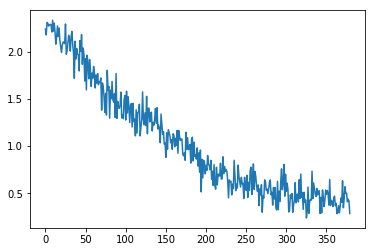

In [26]:
plt.plot(train_loss)

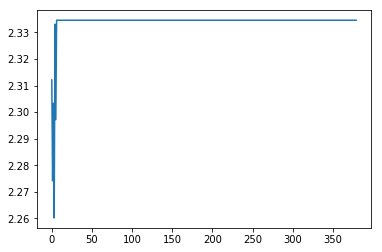

In [29]:
plt.plot(train_loss)

In [24]:
?tf.nn.sparse_softmax_cross_entropy_with_logits

In [ ]:
train_loss[:10]

### TFlearn code


In [58]:
# -*- coding: utf-8 -*-

""" Convolutional network applied to CIFAR-10 dataset classification task.

References:
    Learning Multiple Layers of Features from Tiny Images, A. Krizhevsky, 2009.

Links:
    [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

"""
from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

In [63]:
?conv_2d

In [6]:
# Data loading and preprocessing
X = np.transpose(cifar10_data['X_train'], axes= (0, 2, 3, 1))
print(X.shape)
X_test =  np.transpose(cifar10_data['X_test'], axes= (0, 2, 3, 1))
print(X_test.shape)
Y, Y_test = cifar10_data['y_train'], cifar10_data['y_test']
Y = to_categorical(Y, 10)
Y_test = to_categorical(Y_test, 10)

NameError: name 'np' is not defined

In [ ]:
tf.reset_default_graph()
# Real-time data preprocessing
#img_prep = ImagePreprocessing()
#img_prep.add_featurewise_zero_center()
#img_prep.add_featurewise_stdnorm()

# Real-time data augmentation
#img_aug = ImageAugmentation()
#img_aug.add_random_flip_leftright()
#img_aug.add_random_rotation(max_angle=25.)

# Convolutional network building
network = input_data(shape=[None, 32, 32, 3])
network = conv_2d(network, 48, 5, activation='relu')
network = conv_2d(network, 24, 3, activation='relu')
network = max_pool_2d(network, 2)
network = conv_2d(network, 24, 3, activation='relu')
network = conv_2d(network, 24, 5, activation='relu')
network = max_pool_2d(network, 2)
network = fully_connected(network, 192, activation='relu')
#network = dropout(network, 0.5)
network = fully_connected(network, 10, activation='softmax')
network = regression(network, optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

# Train using classifier
model = tflearn.DNN(network, tensorboard_verbose=1)
model.fit(X[:128], Y[:128], n_epoch=20, shuffle=True, validation_set=(X_test, Y_test),
          show_metric=True, batch_size=64, run_id='cifar10_cnn')

### Testing various functions in tensorflow

In [19]:
tf.reset_default_graph()
a = tf.get_variable('a', shape=[64, 32, 32, 5])
b = tf.get_variable('b', shape=[64, 16, 16, 10])

b_pad = tf.pad(b, [[0, 0], [8, 8], [8, 8], [0, 0]])
concat_dim = tf.Variable(0, tf.int32)
c = tf.concat([a, b_pad], 3)

In [21]:
print(b.shape[1])

16


In [25]:
def concat_inputs(inputs):
    all_h = [v.shape[1].value for v in inputs]
    all_w = [v.shape[2].value for v in inputs]
    output_h = np.max(all_h)
    output_w = np.max(all_w)
    padded_inputs = []
    for i, v in enumerate(inputs):
        h, w = v.shape[1].value, v.shape[2].value
        pad_h, pad_w = (output_h - h)/2, (output_w - w)/2
        padding = np.array([[0, 0], [pad_h, pad_h], [pad_w, pad_w], [0, 0]])
        padded_inputs.append(tf.pad(v, padding))
    result = tf.concat(padded_inputs, 3)
    return result

c = concat_inputs([a, b])

In [23]:
a = tf.placeholder(tf.bool)

<tf.Tensor 'Placeholder_6:0' shape=<unknown> dtype=bool>

In [30]:
a = 'layer_1'; isinstance(a, list)

False